In [1]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

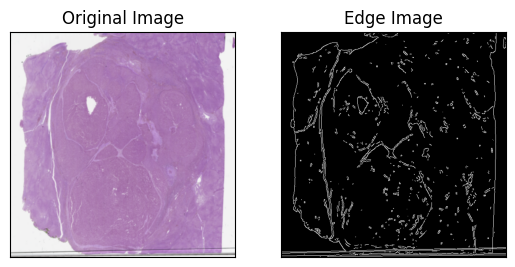

In [3]:
# img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
img = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
grey_img = img
grey_img = cv.GaussianBlur(grey_img, (3,3), 0)
edges = cv.Canny(grey_img, 80, 100)
resized_image = cv.resize(img, (512,512))

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

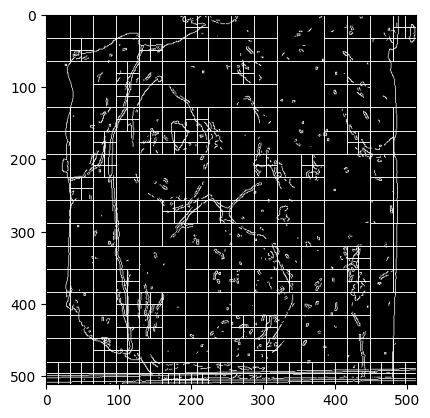

385


In [8]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=385)
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()

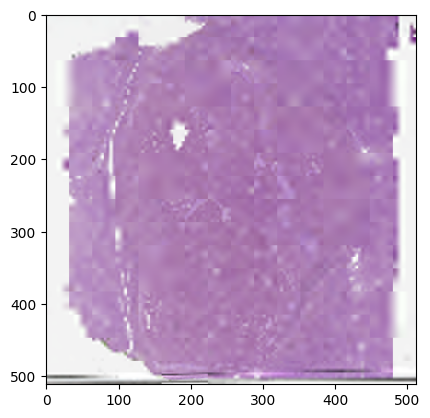

In [9]:
def patchify(mask):
    seq = qdt.serialize(mask, size=(4,4,3))
    return seq

def depatchify(seq):
    mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, mask=mask)
    return mask

mask=img
seq = patchify(mask=mask)

fig, ax = plt.subplots()
mask= depatchify(seq=seq)
mask = mask.astype(np.uint8)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()

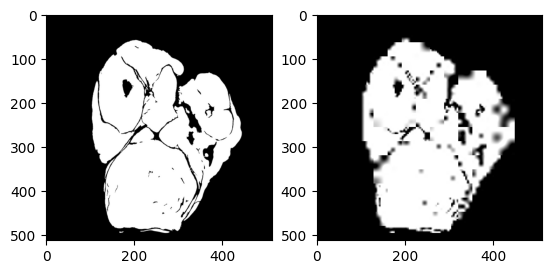

In [10]:
mask = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
mask = cv.resize(mask, (512,512))

seq = patchify(mask=mask)

plt.subplot(121)
plt.imshow(mask)
mask= depatchify(seq=seq)
mask = mask.astype(np.uint8)
plt.subplot(122)
plt.imshow(mask)
# ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()
